<a href="https://colab.research.google.com/github/TushitPalamkar/PyTorch/blob/main/PyTorch_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sklearn
from sklearn.datasets import make_circles

In [3]:
n_samples=1000
X,y=make_circles(n_samples,noise=0.03,random_state=42)
X[:5],y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [4]:
import pandas as pd
circles=pd.DataFrame({"X1": X[:,0], "X2":X[:,1],"label":y})
circles

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


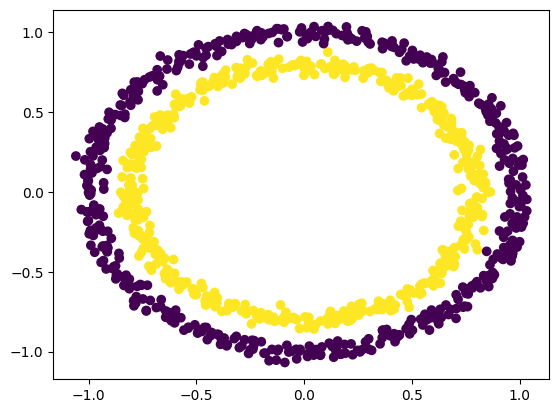

In [5]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],y=X[:,1],c=y)

In [6]:
import torch
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [7]:
X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
import torch.nn as nn
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    #Create a neural network layer
    self.layer_1=nn.Linear(in_features=2,out_features=5)
    self.layer_2=nn.Linear(in_features=5,out_features=1)

  def forward(self,x):
    return self.layer_2(self.layer_1(x))

model_0=CircleModel()
model_0

CircleModel(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [28]:
model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [29]:
with torch.inference_mode():
  untrained_model=model_0(X_test)
untrained_model

tensor([[ 0.1021],
        [ 0.0378],
        [ 0.0851],
        [ 0.1077],
        [-0.2096],
        [-0.2466],
        [-0.1941],
        [-0.2615],
        [ 0.0976],
        [ 0.0302],
        [ 0.1338],
        [ 0.0695],
        [-0.2375],
        [ 0.0338],
        [ 0.1396],
        [-0.2319],
        [-0.0729],
        [ 0.1762],
        [ 0.1353],
        [ 0.1876],
        [ 0.0410],
        [-0.3009],
        [ 0.1461],
        [ 0.2042],
        [-0.1254],
        [-0.2202],
        [-0.0831],
        [-0.2944],
        [ 0.1587],
        [-0.0103],
        [-0.1456],
        [-0.1080],
        [ 0.1248],
        [-0.1404],
        [ 0.1466],
        [-0.0032],
        [ 0.0897],
        [ 0.0511],
        [-0.1018],
        [ 0.0139],
        [ 0.1540],
        [ 0.1239],
        [-0.0782],
        [-0.2264],
        [ 0.1307],
        [-0.0184],
        [-0.2482],
        [ 0.0504],
        [ 0.0094],
        [-0.2313],
        [ 0.1121],
        [ 0.1305],
        [-0.

In [30]:
#Loss function
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [31]:
def accuracy(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

In [32]:

with torch.inference_mode():
  y_logits=model_0(X_test)[:5]
y_logits

tensor([[ 0.1021],
        [ 0.0378],
        [ 0.0851],
        [ 0.1077],
        [-0.2096]])

In [36]:
y_test[:5]
y_pred_probs=torch.sigmoid(y_logits)
torch.round(y_pred_probs)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [0.]])

In [38]:
y_preds=torch.round(y_pred_probs)
y_preds_labels=torch.round(torch.sigmoid(model_0(X_test))[:5])
print(torch.eq(y_preds.squeeze(),y_preds_labels.squeeze()))
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 1., 1., 0.])

In [41]:
torch.manual_seed(42)
epochs=100
for epoch in range(epochs):
  model_0.train()
  y_logits=model_0(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))
  loss=loss_fn(y_logits,y_train)
  acc=accuracy(y_true=y_train,y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()
  with torch.inference_mode():
    test_logits=model_0(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy(y_true=y_test,y_pred=test_pred)
  if epoch%10==0:
    print(f"Epoch:{epoch} | Loss:{loss} | Acc:{acc:.2f} | Test_loss:{test_loss} |Test Acc:{test_acc}")

Epoch:0 | Loss:0.6931278705596924 | Acc:50.88 | Test_loss:0.6940990686416626 |Test Acc:50.5
Epoch:10 | Loss:0.6931079030036926 | Acc:50.38 | Test_loss:0.6941162347793579 |Test Acc:51.5
Epoch:20 | Loss:0.6930906772613525 | Acc:50.62 | Test_loss:0.6941339373588562 |Test Acc:50.0
Epoch:30 | Loss:0.6930758953094482 | Acc:51.00 | Test_loss:0.6941522359848022 |Test Acc:48.0
Epoch:40 | Loss:0.6930630207061768 | Acc:50.50 | Test_loss:0.6941704750061035 |Test Acc:47.5
Epoch:50 | Loss:0.6930519342422485 | Acc:50.88 | Test_loss:0.6941888332366943 |Test Acc:48.0
Epoch:60 | Loss:0.6930424571037292 | Acc:50.38 | Test_loss:0.6942071318626404 |Test Acc:47.5
Epoch:70 | Loss:0.6930340528488159 | Acc:50.88 | Test_loss:0.6942252516746521 |Test Acc:49.0
Epoch:80 | Loss:0.6930269002914429 | Acc:50.75 | Test_loss:0.6942430138587952 |Test Acc:48.0
Epoch:90 | Loss:0.6930207014083862 | Acc:51.25 | Test_loss:0.6942604184150696 |Test Acc:46.0


In [47]:
y_logits.size()
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
  print("File already exists")
else:
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

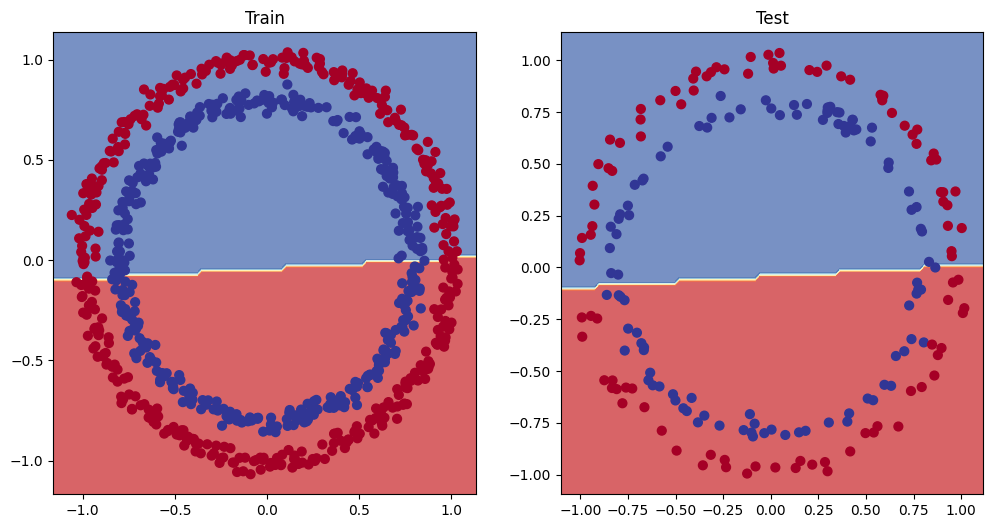

In [48]:
from helper_functions import plot_predictions, plot_decision_boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [52]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)
  def forward(self,x):
    return self.layer_3(self.layer_2(self.layer_1(x)))
model_1=CircleModelV1()
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [55]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.1)

In [56]:
torch.manual_seed(42)
epochs=1000
for epoch in range(epochs):
  model_1.train()
  y_logits=model_1(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  loss=loss_fn(y_logits,y_train)
  acc=accuracy(y_true=y_logits,y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_1.eval()
  with torch.inference_mode():
    test_logits=model_0(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy(y_true=y_test,y_pred=test_pred)
  if epoch%100==0:
    print(f"Epoch:{epoch} | Loss:{loss} | Acc:{acc:.2f} | Test_loss:{test_loss} |Test Acc:{test_acc}")

Epoch:0 | Loss:0.6968519687652588 | Acc:0.00 | Test_loss:0.6942756772041321 |Test Acc:46.5
Epoch:100 | Loss:0.693257212638855 | Acc:0.00 | Test_loss:0.6942756772041321 |Test Acc:46.5
Epoch:200 | Loss:0.6930144429206848 | Acc:0.00 | Test_loss:0.6942756772041321 |Test Acc:46.5
Epoch:300 | Loss:0.6929842233657837 | Acc:0.00 | Test_loss:0.6942756772041321 |Test Acc:46.5
Epoch:400 | Loss:0.6929804086685181 | Acc:0.00 | Test_loss:0.6942756772041321 |Test Acc:46.5
Epoch:500 | Loss:0.6929799914360046 | Acc:0.00 | Test_loss:0.6942756772041321 |Test Acc:46.5
Epoch:600 | Loss:0.6929798722267151 | Acc:0.00 | Test_loss:0.6942756772041321 |Test Acc:46.5
Epoch:700 | Loss:0.6929798126220703 | Acc:0.00 | Test_loss:0.6942756772041321 |Test Acc:46.5
Epoch:800 | Loss:0.6929798722267151 | Acc:0.00 | Test_loss:0.6942756772041321 |Test Acc:46.5
Epoch:900 | Loss:0.6929798126220703 | Acc:0.00 | Test_loss:0.6942756772041321 |Test Acc:46.5


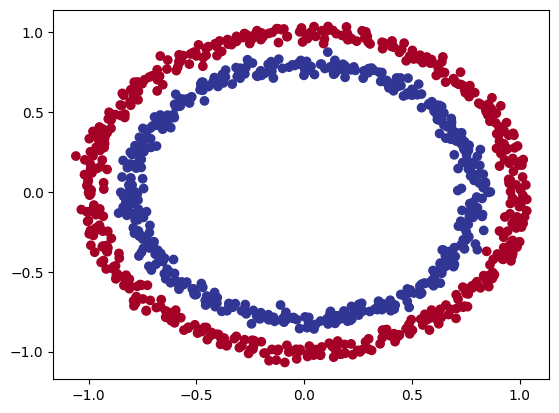

In [57]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
n_samples=1000
X,y=make_circles(n_samples,noise=0.03,random_state=42)
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [58]:
import torch
from sklearn.model_selection import train_test_split
X= torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train[:5],y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [59]:
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)
    self.relu=nn.ReLU()
  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
model_2=CircleModelV2()
model_2

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [60]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_2.parameters(),lr=0.1)

In [65]:
torch.manual_seed(42)
epochs=1000
for epoch in range(epochs):
  model_2.train()
  y_logits=model_2(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))
  loss=loss_fn(y_logits,y_train)
  acc=accuracy(y_true=y_train,y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_2.eval()
  with torch.inference_mode():
    test_logits=model_2(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy(y_true=y_test,y_pred=test_pred)
  if epoch%100==0:
    print(f"Epoch:{epoch} | Loss:{loss} | Acc:{acc:.2f} | Test_loss:{test_loss} |Test Acc:{test_acc}")


Epoch:0 | Loss:0.04176006466150284 | Acc:99.88 | Test_loss:0.06583178788423538 |Test Acc:100.0
Epoch:100 | Loss:0.03627745062112808 | Acc:99.88 | Test_loss:0.05978531017899513 |Test Acc:100.0
Epoch:200 | Loss:0.03204609081149101 | Acc:99.88 | Test_loss:0.05459870770573616 |Test Acc:100.0
Epoch:300 | Loss:0.028718719258904457 | Acc:99.88 | Test_loss:0.050223782658576965 |Test Acc:100.0
Epoch:400 | Loss:0.026041092351078987 | Acc:99.88 | Test_loss:0.04661701247096062 |Test Acc:100.0
Epoch:500 | Loss:0.02383076585829258 | Acc:99.88 | Test_loss:0.04362647980451584 |Test Acc:100.0
Epoch:600 | Loss:0.02195644937455654 | Acc:99.88 | Test_loss:0.04091140255331993 |Test Acc:100.0
Epoch:700 | Loss:0.020358892157673836 | Acc:99.88 | Test_loss:0.038642048835754395 |Test Acc:100.0
Epoch:800 | Loss:0.01897726207971573 | Acc:99.88 | Test_loss:0.03680308908224106 |Test Acc:100.0
Epoch:900 | Loss:0.01777561381459236 | Acc:99.88 | Test_loss:0.03511775657534599 |Test Acc:100.0


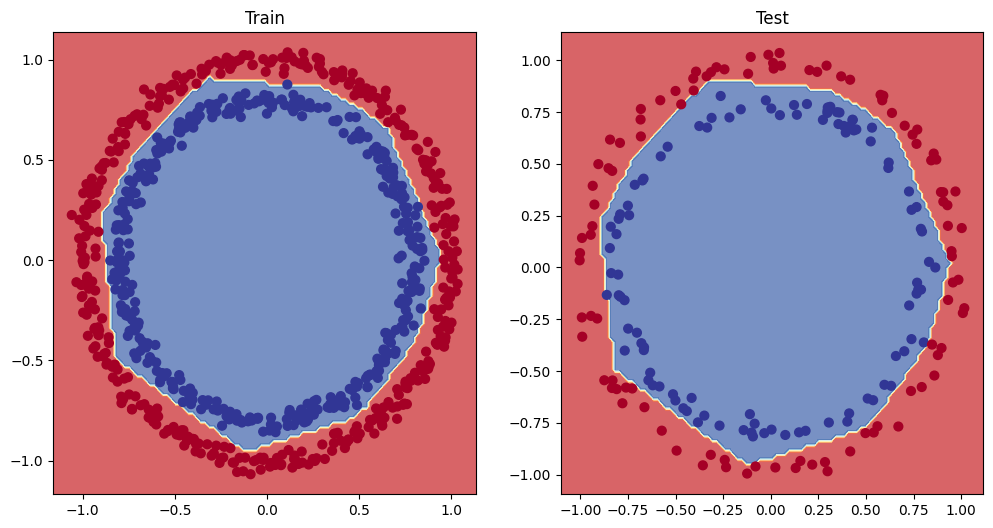

In [66]:
from helper_functions import plot_predictions, plot_decision_boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_2, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test)